In [1]:
import os
import numpy as np
import mediapipe as mp
import torch
import cv2
from mediapipe.python.solutions.pose import POSE_CONNECTIONS
mp_pose = mp.solutions.pose
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import pickle


In [2]:
# Load the dataset
import pickle
coffee_1 = "coffee_1.pkl"
with open(coffee_1, 'rb') as f:
    coffee_1 = pickle.load(f)
print(f"Loaded dataset size: {len(coffee_1)}")

coffee_2 = "coffee_2.pkl"
with open(coffee_2, 'rb') as f:
    coffee_2 = pickle.load(f)
print(f"Loaded dataset size: {len(coffee_2)}")

home_1 = "home_1.pkl"
with open(home_1, 'rb') as f:
    home_1 = pickle.load(f)
print(f"Loaded dataset size: {len(home_1)}")

home_2 = "home_2.pkl"
with open(home_2, 'rb') as f:
    home_2 = pickle.load(f)
print(f"Loaded dataset size: {len(home_2)}")

office = "office.pkl"
with open(office, 'rb') as f:
    office = pickle.load(f)
print(f"Loaded dataset size: {len(office)}")

lecture_room = "lecture_room.pkl"
with open(lecture_room, 'rb') as f:
    lecture_room = pickle.load(f)
print(f"Loaded dataset size: {len(lecture_room)}")

# Combine the datasets
combined_data = []
for data in [coffee_1, coffee_2, home_1, home_2, office, lecture_room]:
    combined_data.extend(data)
print(f"Combined dataset size: {len(combined_data)}")
# Shuffle the combined data

Loaded dataset size: 48
Loaded dataset size: 22
Loaded dataset size: 30
Loaded dataset size: 30
Loaded dataset size: 33
Loaded dataset size: 27
Combined dataset size: 190


In [ ]:
# shuffle and split the data
np.random.shuffle(combined_data)
train_size = int(0.8 * len(combined_data))
train_data = combined_data[:train_size]
test_data = combined_data[train_size:]

# output to pkl
with open('train_data.pkl', 'wb') as f:
    pickle.dump(train_data, f)
with open('test_data.pkl', 'wb') as f:
    pickle.dump(test_data, f)

NameError: name 'combined_data' is not defined

In [5]:
# open pkl 
with open('train_falls_le2.pkl', 'rb') as f:
    train_data = pickle.load(f)
with open('test_falls_le2.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [6]:
train_data[0]

(tensor([[[ 5.0693e-01,  5.0804e-01,  5.0968e-01,  ...,  6.0951e-01,
            5.6077e-01,  5.6676e-01],
          [ 5.0428e-01,  5.0572e-01,  5.0756e-01,  ...,  6.0648e-01,
            5.5435e-01,  5.6453e-01],
          [ 4.9868e-01,  5.0074e-01,  5.0256e-01,  ...,  6.0073e-01,
            5.5759e-01,  5.6138e-01],
          ...,
          [ 2.8274e-01,  2.7418e-01,  2.7354e-01,  ...,  6.1564e-01,
            6.1091e-01,  6.1231e-01],
          [ 2.8297e-01,  2.7466e-01,  2.7407e-01,  ...,  6.1843e-01,
            6.1568e-01,  6.1369e-01],
          [ 2.8336e-01,  2.7496e-01,  2.7435e-01,  ...,  6.2067e-01,
            6.1602e-01,  6.1601e-01]],
 
         [[ 2.9552e-01,  2.8131e-01,  2.8075e-01,  ...,  7.6322e-01,
            7.8944e-01,  7.7405e-01],
          [ 2.9397e-01,  2.7943e-01,  2.7889e-01,  ...,  7.5877e-01,
            7.9264e-01,  7.7460e-01],
          [ 2.9290e-01,  2.7811e-01,  2.7763e-01,  ...,  7.6506e-01,
            8.1351e-01,  7.8305e-01],
          ...,
    

In [8]:
# length of model 
print(f"Length of train data: {len(train_data)}")
print(f"Length of test data: {len(test_data)}")

Length of train data: 152
Length of test data: 38


In [9]:
# check in train and test how many falls and non-falls
train_falls = 0
train_non_falls = 0
for data in train_data:
    if data[1] == 1:
        train_falls += 1
    else:
        train_non_falls += 1
print(f"Train falls: {train_falls}")
print(f"Train non-falls: {train_non_falls}")
test_falls = 0
test_non_falls = 0
for data in test_data:
    if data[1] == 1:
        test_falls += 1
    else:
        test_non_falls += 1
print(f"Test falls: {test_falls}")
print(f"Test non-falls: {test_non_falls}")

Train falls: 104
Train non-falls: 48
Test falls: 26
Test non-falls: 12


In [6]:
# open pkl 
with open('train_ur_fall_50_frames_4_features.pkl', 'rb') as f:
    train_data_new_set = pickle.load(f)
with open('val_ur_fall_50_frames_4_features.pkl', 'rb') as f:
    test_data_new_set = pickle.load(f)

In [26]:
new_dataset = []
for data, label in train_data_new_set:
    # convert data to torch tensor
    print(type(data))
    data = torch.tensor(data, dtype=torch.float32)
    # convert label to int
    label = int(label)
    break

<class 'tensorflow.python.framework.ops.EagerTensor'>


TypeError: Scalar tensor has no `len()`

In [30]:
train_data_new_set = [
    (torch.tensor(data[0].numpy()).permute(2, 0, 1), data[1])
    for data in train_data_new_set
]

In [31]:
train_data_new_set[0][0].shape

torch.Size([4, 33, 50])

In [7]:
# see how many falls and non-falls
train_falls = 0
train_non_falls = 0
for data in train_data:
    if data[1] == 1:
        train_falls += 1
    else:
        train_non_falls += 1
print(f"Train falls: {train_falls}")
print(f"Train non-falls: {train_non_falls}")
test_falls = 0
test_non_falls = 0
for data in test_data:
    if data[1] == 1:
        test_falls += 1
    else:
        test_non_falls += 1
print(f"Test falls: {test_falls}")
print(f"Test non-falls: {test_non_falls}")

Train falls: 104
Train non-falls: 48
Test falls: 26
Test non-falls: 12


In [ ]:
mp_pose = mp.solutions.pose
pose_detector = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)


def extract_pose_from_frame(frame):
    results = pose_detector.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    if results.pose_landmarks:
        pose_data = np.array([[lm.x, lm.y, lm.z, lm.visibility] for lm in results.pose_landmarks.landmark])
        return pose_data  # Shape: (33, 4)
    return np.zeros((33, 4))  # Return zeros if no pose detected

# Modified extract_pose_from_video to center around fall event
def extract_pose_from_video(video_path, max_frames, fall_start=None, fall_end=None):
    cap = cv2.VideoCapture(video_path)
    pose_sequence = []
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        pose_data = extract_pose_from_frame(frame)
        pose_sequence.append(pose_data)
    
    cap.release()
    
    if not pose_sequence:
        return None
    
    pose_tensor = torch.tensor(pose_sequence, dtype=torch.float32)  # Shape: (T, 33, 4)
    T, V, C = pose_tensor.shape
    
    # Center around fall event
    if fall_start is not None and fall_end is not None and fall_start > 0:
        mid_frame = (fall_start + fall_end) // 2
        start_frame = max(0, mid_frame - max_frames // 2)
        end_frame = start_frame + max_frames
        if end_frame > T:
            start_frame = max(0, T - max_frames)
            end_frame = T
        pose_tensor = pose_tensor[start_frame:end_frame, :, :]

    # NOW recompute T after slicing
    T, V, C = pose_tensor.shape
    # Pad or crop
    if T > max_frames:
        # pick the first frame which is not zero
        first_non_zero = 0
        for i in range(T):
            if pose_tensor[i, :, :].sum() > 0:
                first_non_zero = i
                break
        # crop from the front of the video
        pose_tensor = pose_tensor[first_non_zero:first_non_zero + max_frames, :, :]
    elif T < max_frames:
        raise ValueError(f"Video too short: {video_path} with length {T} < {max_frames}")

    # Permute for final shape
    pose_tensor = pose_tensor.permute(2, 0, 1)  # (4, max_frames, 33)
    return pose_tensor

# Update data_pairs to include fall_start and fall_end
def parse_ground_truth(gt_file):
    try:
        with open(gt_file, 'r') as f:
            lines = f.readlines()
            if not lines:
                print(f"Empty annotation file: {gt_file}")
                return 0, None, None
            try:
                fall_start = int(lines[0].strip())
                fall_end = int(lines[1].strip()) if len(lines) > 1 else None
            except (ValueError, IndexError):
                print(f"No valid fall start/end frame in {gt_file}")
                return 0, None, None
            if fall_start == 0:
                return 0, None, None
            return 1, fall_start, fall_end
    except FileNotFoundError:
        print(f"Annotation file not found: {gt_file}")
        return 0, None, None


I0000 00:00:1745078792.274678 8550576 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M4 Pro


W0000 00:00:1745078792.339659 8614003 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745078792.354051 8614013 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [ ]:
base_dir = ["archive/Home_02/Home_02" , "archive/Coffee_room_01/Coffee_room_01", "archive/Office/Office", "archive/Lecture_room_01/Lecture_room_01"
            "archive/Home_01/Home_01" , "archive/Coffee_room_02/Coffee_room_02"]


dataset = {}
for base in base_dir:
    videos_dir = os.path.join(base, "Videos")
    annotations_dir = os.path.join(base, "Annotation_files")

    # List all video files
    video_files = [f for f in os.listdir(videos_dir) if f.endswith(".avi")]
    video_files.sort()
    video_files = video_files[-10:]

    # Create data_pairs with fall_start and fall_end
    data_pairs = []
    for video_file in video_files:
        video_path = os.path.join(videos_dir, video_file)
        annotation_file = video_file.replace(".avi", ".txt")
        annotation_path = os.path.join(annotations_dir, annotation_file)
        label, fall_start, fall_end = parse_ground_truth(annotation_path)
        if label == 0:
            print("This video has no fall", video_file)
        data_pairs.append((video_path, annotation_path, label, fall_start, fall_end))

    max_frames = 50
    
    for video_path, annotation_path, label, fall_start, fall_end in data_pairs:
        pose_tensor = extract_pose_from_video(video_path, max_frames, fall_start, fall_end)
        if pose_tensor is not None:
            dataset[video_path] = (pose_tensor, label)
        else:
            print(f"Skipping video {video_path}: No pose data extracted")

    print(f"Dataset size: {len(dataset)}")

# Save the dataset to a pickle file
with open('pose_dataset_home.pkl', 'wb') as f:
    pickle.dump(dataset, f)
print("Dataset saved to pose_dataset_home.pkl")


This video has no fall video (51).avi
This video has no fall video (52).avi
This video has no fall video (53).avi
This video has no fall video (54).avi
This video has no fall video (55).avi
This video has no fall video (56).avi
This video has no fall video (57).avi
This video has no fall video (58).avi
This video has no fall video (59).avi
This video has no fall video (60).avi
Dataset size: 10
Dataset saved to pose_dataset_home.pkl


In [29]:
# duplicates = []
# for i in range(len(data)):
#     for j in range(i+1, len(data)):
#         if torch.equal(data[i][0], data[j][0]):
#             print("Duplicate found: ", i, j)
# print("Number of duplicates: ", len(duplicates))

# check for duplicates in dataset
for video_path, (pose_tensor, label) in dataset.items():
    print(f"Video: {video_path}, Pose Tensor Shape: {pose_tensor.shape}, Label: {label}")
    # Check if the pose tensor is empty
    print(pose_tensor)
    if pose_tensor.numel() == 0:
        print(f"Empty pose tensor for video: {video_path}")
        print(pose_tensor)


Video: archive/Home_02/Home_02/Videos/video (51).avi, Pose Tensor Shape: torch.Size([4, 50, 33]), Label: 0
tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.2171,  0.2185,  0.2204,  ...,  0.2929,  0.3229,  0.3000],
         [ 0.2176,  0.2186,  0.2204,  ...,  0.2922,  0.3231,  0.2995],
         [ 0.2177,  0.2186,  0.2204,  ...,  0.2935,  0.3230,  0.2998]],

        [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 0.2492,  0.2385,  0.2375,  ...,  0.5036,  0.5296,  0.5263],
         [ 0.2481,  0.2377,  0.2368,  ...,  0.5034,  0.5294,  0.5259],
         [ 0.2478,  0.2375,  0.2366,  ...,  0.5058,  0.5293,  0.5285]],

        [

In [12]:
# shuffle and split the data
np.random.shuffle(dataset)
train_size = int(0.8 * len(dataset))
train_data = dataset[:train_size]
test_data = dataset[train_size:]

# How many falls in train and test data
train_falls = sum(label for _, label in train_data)
test_falls = sum(label for _, label in test_data)
print(f"Train data falls: {train_falls/len(train_data)}, Test data falls: {test_falls/len(test_data)}")

Train data falls: 0.6842105263157895, Test data falls: 0.6842105263157895


In [15]:
# output train_falls and test_falls to pkl
with open('train_falls_le2.pkl', 'wb') as f:
    pickle.dump(train_data, f)
with open('test_falls_le2.pkl', 'wb') as f:
    pickle.dump(test_data, f)

In [ ]:
max_frames = 50

# Extract pose data with centering around fall event
dataset = []
for video_path, annotation_path, label, fall_start, fall_end in data_pairs:
    pose_tensor = extract_pose_from_video(video_path, max_frames, fall_start, fall_end)
    if pose_tensor is not None:
        dataset.append((pose_tensor, label))
    else:
        print(f"Skipping video {video_path}: No pose data extracted")

print(f"Dataset size: {len(dataset)}")

[mp3float @ 0x10db242b0] Header missing
[mp3float @ 0x10db242b0] Header missing
[mp3float @ 0x10db242b0] Header missing
[mp3float @ 0x10db242b0] Header missing
W0000 00:00:1743448336.584715 25553926 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/var/folders/6f/ll1xpj_x1_96t89d8vpkcb2m0000gn/T/ipykernel_39540/1579932052.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:257.)
  pose_tensor = torch.tensor(pose_sequence, dtype=torch.float32)  # Shape: (T, 33, 4)
[mp3float @ 0x10d1bb430] Header missing
[mp3float @ 0x34007a6d0] Header missing
[mp3float @ 0x10c0b0f60] Header missing
[mp3float @ 0x109fe9520] Header missing
[mp3f

Dataset size: 22


In [8]:
for i, (pose_tensor, label) in enumerate(dataset):
    print(f"Pose tensor {i}: shape={pose_tensor.shape}, label={label}")
    # Save or process the pose_tensor as needed
    # For example, save to disk or feed into a model

Pose tensor 0: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 1: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 2: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 3: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 4: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 5: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 6: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 7: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 8: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 9: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 10: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 11: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 12: shape=torch.Size([4, 500, 33]), label=0
Pose tensor 13: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 14: shape=torch.Size([4, 500, 33]), label=0
Pose tensor 15: shape=torch.Size([4, 500, 33]), label=1
Pose tensor 16: shape=torch.Size([4, 500, 33]), label=0
Pose tensor 17: shape=torch.Size([4, 500, 33]), label=0
Po

In [ ]:
# save the dataset
output_file = "pose_dataset.pkl"
with open(output_file, 'wb') as f:
    pickle.dump(dataset, f)
print(f"Dataset saved to {output_file}")

Dataset saved to pose_dataset.pkl


In [6]:
# Load the dataset
import pickle
output_file = "pose_dataset.pkl"
with open(output_file, 'rb') as f:
    loaded_dataset = pickle.load(f)
print(f"Loaded dataset size: {len(loaded_dataset)}")

Loaded dataset size: 22


In [24]:
# Select a failure 

fail_case = None
for i, (pose_tensor, label) in enumerate(loaded_dataset):
    if label == 0:
        fail_case = pose_tensor

In [33]:
poses = loaded_dataset[0][0]

In [34]:
joint_indices = {
    "head": 0,
    "left_foot": 32,
    "right_foot": 31,
    "spine": 24
}

In [35]:
y = poses[1]
x = poses[0]
z = poses[2]

In [36]:
head_y = y[:, joint_indices["head"]]
left_foot_y = y[:, joint_indices["left_foot"]]

In [37]:
head_y = head_y[head_y != 0]
left_foot_y = left_foot_y[left_foot_y != 0]

In [38]:
head_y

tensor([0.3644, 0.3653, 0.3723, 0.3764, 0.3799, 0.3846, 0.3863, 0.3927, 0.3947,
        0.3972, 0.3978, 0.4022, 0.4083, 0.4201, 0.4226, 0.4259, 0.4294, 0.4338,
        0.4328, 0.4305, 0.4287, 0.4270, 0.4235, 0.4225, 0.4192, 0.4152, 0.4114,
        0.4027, 0.3938, 0.3875, 0.3837, 0.3789, 0.3733, 0.3714, 0.3681, 0.3664,
        0.3666, 0.3663, 0.3672, 0.3679, 0.3686, 0.3690, 0.3691, 0.3704, 0.3729,
        0.3774, 0.3822, 0.3862, 0.3898, 0.3962, 0.4022, 0.4067, 0.4092, 0.4121,
        0.4199, 0.4264, 0.4362, 0.4453, 0.4489, 0.4478, 0.4428, 0.4405, 0.4355,
        0.4259, 0.4184, 0.4121, 0.4046, 0.3974, 0.3939, 0.3904, 0.3879, 0.3854,
        0.3848, 0.3851, 0.3866, 0.3911, 0.3981, 0.4070, 0.4191, 0.4278, 0.4321,
        0.4384, 0.4421, 0.4441, 0.4475, 0.4510, 0.4509, 0.4498, 0.4489, 0.4484,
        0.4439, 0.4352, 0.4243, 0.4166, 0.4104, 0.4039, 0.3989, 0.3937, 0.3885,
        0.3819, 0.3779, 0.3721, 0.3686, 0.3668, 0.3645, 0.3634, 0.3635, 0.3642,
        0.3647, 0.3656, 0.3663, 0.3695, 

In [39]:
left_foot_y

tensor([0.9266, 0.9917, 1.0117, 1.0205, 1.0773, 1.0916, 1.1154, 1.1214, 1.1159,
        1.1096, 1.1078, 1.1134, 1.1228, 1.1162, 1.1116, 1.1221, 1.1150, 1.1121,
        1.1140, 1.1132, 1.1011, 1.0972, 1.0916, 1.0958, 1.0977, 1.0971, 1.0844,
        1.0701, 1.0720, 1.0592, 1.0120, 0.9814, 0.9816, 0.9687, 0.9720, 0.9831,
        0.9786, 0.9780, 0.9769, 0.9759, 0.9790, 0.9842, 1.0734, 1.0856, 1.0753,
        1.0641, 1.0348, 1.0158, 1.0122, 1.0081, 0.9855, 0.9824, 0.9885, 0.9845,
        0.9889, 0.9885, 0.9830, 0.9855, 0.9968, 1.0092, 1.0378, 1.0727, 1.0945,
        1.0898, 1.0747, 1.0707, 1.0532, 0.9800, 0.9468, 0.9496, 0.9482, 0.9519,
        0.9463, 0.9482, 0.9447, 0.9484, 0.9506, 1.0003, 1.0162, 1.0392, 1.0236,
        1.0150, 1.0190, 1.0293, 1.0366, 1.0329, 1.0204, 1.0198, 0.9937, 0.9708,
        0.9657, 0.9699, 0.9658, 0.9715, 0.9722, 0.9670, 0.9696, 0.9717, 0.9727,
        0.9766, 0.9767, 0.9738, 0.9739, 0.9733, 0.9728, 0.9677, 0.9690, 0.9619,
        0.9751, 0.9832, 0.9826, 0.9794, 

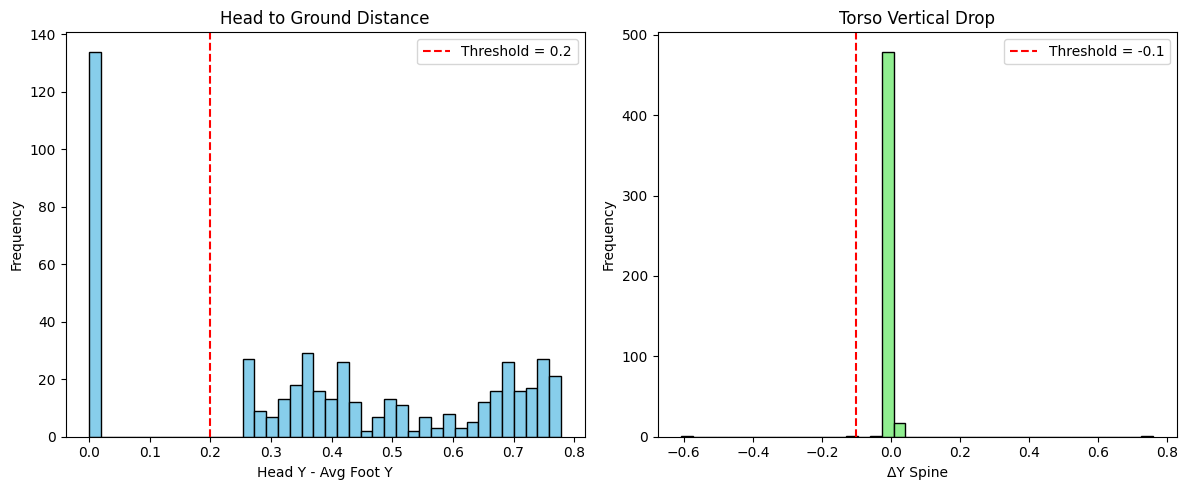

In [41]:
import torch
import matplotlib.pyplot as plt

# poses = loaded_dataset[0][0]
y = fail_case[1]  # assuming [C=4, T, V], extract y-coordinates → shape [500, 33]

# Joint indices (adjust if your skeleton format is different)
joint_indices = {
    "head": 0,
    "left_foot": 32,
    "right_foot": 31,
    "spine": 24
}

# Rule 1: Head-ground proximity
head_y = y[:, joint_indices["head"]]
left_foot_y = y[:, joint_indices["left_foot"]]
right_foot_y = y[:, joint_indices["right_foot"]]
avg_foot_y = (left_foot_y + right_foot_y) / 2
head_to_ground = avg_foot_y - head_y  # delta y (higher y means closer to ground)

# Rule 3: Sudden torso drop
spine_y = y[:, joint_indices["spine"]]
torso_drop = spine_y[:-1] - spine_y[1:]  # delta y
torso_drop = torch.cat([torch.tensor([0.0]), torso_drop])  # pad to match shape

# Plot both
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(head_to_ground.numpy(), bins=40, color='skyblue', edgecolor='black')
plt.axvline(x=0.2, color='red', linestyle='--', label='Threshold = 0.2')
plt.title("Head to Ground Distance")
plt.xlabel("Head Y - Avg Foot Y")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(torso_drop.numpy(), bins=40, color='lightgreen', edgecolor='black')
plt.axvline(x=-0.1, color='red', linestyle='--', label='Threshold = -0.1')
plt.title("Torso Vertical Drop")
plt.xlabel("ΔY Spine")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt


y = fail_case[1]  # assuming [C=4, T, V], extract y-coordinates → shape [500, 33]

# Joint indices (adjust if your skeleton format is different)
joint_indices = {
    "head": 0,
    "left_foot": 32,
    "right_foot": 31,
    "spine": 1
}

# Rule 1: Head-ground proximity
head_y = y[:, joint_indices["head"]]
left_foot_y = y[:, joint_indices["left_foot"]]
right_foot_y = y[:, joint_indices["right_foot"]]
avg_foot_y = (left_foot_y + right_foot_y) / 2
head_to_ground = head_y - avg_foot_y

# Rule 3: Sudden torso drop
spine_y = y[:, joint_indices["spine"]]
torso_drop = spine_y[1:] - spine_y[:-1]  # delta y
torso_drop = torch.cat([torch.tensor([0.0]), torso_drop])  # pad to match shape

# Plot both
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(head_to_ground.numpy(), bins=40, color='skyblue', edgecolor='black')
plt.axvline(x=0.2, color='red', linestyle='--', label='Threshold = 0.2')
plt.title("Head to Ground Distance")
plt.xlabel("Head Y - Avg Foot Y")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(torso_drop.numpy(), bins=40, color='lightgreen', edgecolor='black')
plt.axvline(x=-0.1, color='red', linestyle='--', label='Threshold = -0.1')
plt.title("Torso Vertical Drop")
plt.xlabel("ΔY Spine")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
import numpy as np


class Graph():
    """ The Graph to model the skeletons extracted by the openpose

    Args:
        strategy (string): must be one of the follow candidates
        - uniform: Uniform Labeling
        - distance: Distance Partitioning
        - spatial: Spatial Configuration
        For more information, please refer to the section 'Partition Strategies'
            in our paper (https://arxiv.org/abs/1801.07455).

        layout (string): must be one of the follow candidates
        - openpose: Is consists of 18 joints. For more information, please
            refer to https://github.com/CMU-Perceptual-Computing-Lab/openpose#output
        - ntu-rgb+d: Is consists of 25 joints. For more information, please
            refer to https://github.com/shahroudy/NTURGB-D

        max_hop (int): the maximal distance between two connected nodes
        dilation (int): controls the spacing between the kernel points

    """
    def __init__(self,
                 strategy='uniform',
                 max_hop=1,
                 dilation=1):
        self.max_hop = max_hop
        self.dilation = dilation

        self.get_edge()
        self.hop_dis = get_hop_distance(self.num_node,
                                        self.edge,
                                        max_hop=max_hop)
        self.get_adjacency(strategy)

    def __str__(self):
        return self.A

    def get_edge(self):
        # edge is a list of [child, parent] paris

        self.num_node = 33
        self_link = [(i, i) for i in range(self.num_node)]
        neighbor_link = [(0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5),
                              (5, 6), (6, 8), (9, 10), (11, 12), (11, 13),
                              (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
                              (12, 14), (14, 16), (16, 18), (16, 20), (16, 22),
                              (18, 20), (11, 23), (12, 24), (23, 24), (23, 25),
                              (24, 26), (25, 27), (26, 28), (27, 29), (28, 30),
                              (29, 31), (30, 32), (27, 31), (28, 32)]
        self.edge = self_link + neighbor_link
        self.center = 24

    def get_adjacency(self, strategy):
        valid_hop = range(0, self.max_hop + 1, self.dilation)
        adjacency = np.zeros((self.num_node, self.num_node))
        for hop in valid_hop:
            adjacency[self.hop_dis == hop] = 1
        normalize_adjacency = normalize_digraph(adjacency)

        if strategy == 'uniform':
            A = np.zeros((1, self.num_node, self.num_node))
            A[0] = normalize_adjacency
            self.A = A
        elif strategy == 'distance':
            A = np.zeros((len(valid_hop), self.num_node, self.num_node))
            for i, hop in enumerate(valid_hop):
                A[i][self.hop_dis == hop] = normalize_adjacency[self.hop_dis ==
                                                                hop]
            self.A = A
        elif strategy == 'spatial':
            A = []
            for hop in valid_hop:
                a_root = np.zeros((self.num_node, self.num_node))
                a_close = np.zeros((self.num_node, self.num_node))
                a_further = np.zeros((self.num_node, self.num_node))
                for i in range(self.num_node):
                    for j in range(self.num_node):
                        if self.hop_dis[j, i] == hop:
                            if self.hop_dis[j, self.center] == self.hop_dis[
                                    i, self.center]:
                                a_root[j, i] = normalize_adjacency[j, i]
                            elif self.hop_dis[j, self.center] > self.hop_dis[
                                    i, self.center]:
                                a_close[j, i] = normalize_adjacency[j, i]
                            else:
                                a_further[j, i] = normalize_adjacency[j, i]
                if hop == 0:
                    A.append(a_root)
                else:
                    A.append(a_root + a_close)
                    A.append(a_further)
            A = np.stack(A)
            self.A = A
        else:
            raise ValueError("Do Not Exist This Strategy")


def get_hop_distance(num_node, edge, max_hop=1):
    A = np.zeros((num_node, num_node))
    for i, j in edge:
        A[j, i] = 1
        A[i, j] = 1

    # compute hop steps
    hop_dis = np.zeros((num_node, num_node)) + np.inf
    transfer_mat = [np.linalg.matrix_power(A, d) for d in range(max_hop + 1)]
    arrive_mat = (np.stack(transfer_mat) > 0)
    for d in range(max_hop, -1, -1):
        hop_dis[arrive_mat[d]] = d
    return hop_dis


def normalize_digraph(A):
    Dl = np.sum(A, 0)
    num_node = A.shape[0]
    Dn = np.zeros((num_node, num_node))
    for i in range(num_node):
        if Dl[i] > 0:
            Dn[i, i] = Dl[i]**(-1)
    AD = np.dot(A, Dn)
    return AD


def normalize_undigraph(A):
    Dl = np.sum(A, 0)
    num_node = A.shape[0]
    Dn = np.zeros((num_node, num_node))
    for i in range(num_node):
        if Dl[i] > 0:
            Dn[i, i] = Dl[i]**(-0.5)
    DAD = np.dot(np.dot(Dn, A), Dn)
    return DAD

In [43]:
import torch
import torch.nn as nn


class ConvTemporalGraphical(nn.Module):
    r"""The basic module for applying a graph convolution.

    Args:
        in_channels (int): Number of channels in the input sequence data
        out_channels (int): Number of channels produced by the convolution
        kernel_size (int): Size of the graph convolving kernel
        t_kernel_size (int): Size of the temporal convolving kernel
        t_stride (int, optional): Stride of the temporal convolution. Default: 1
        t_padding (int, optional): Temporal zero-padding added to both sides of
            the input. Default: 0
        t_dilation (int, optional): Spacing between temporal kernel elements.
            Default: 1
        bias (bool, optional): If ``True``, adds a learnable bias to the output.
            Default: ``True``

    Shape:
        - Input[0]: Input graph sequence in :math:`(N, in_channels, T_{in}, V)` format
        - Input[1]: Input graph adjacency matrix in :math:`(K, V, V)` format
        - Output[0]: Output graph sequence in :math:`(N, out_channels, T_{out}, V)` format
        - Output[1]: Graph adjacency matrix for output data in :math:`(K, V, V)` format

        where
            :math:`N` is a batch size,
            :math:`K` is the spatial kernel size, as :math:`K == kernel_size[1]`,
            :math:`T_{in}/T_{out}` is a length of input/output sequence,
            :math:`V` is the number of graph nodes. 
    """
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 t_kernel_size=1,
                 t_stride=1,
                 t_padding=0,
                 t_dilation=1,
                 bias=True):
        super().__init__()

        self.kernel_size = kernel_size
        self.conv = nn.Conv2d(in_channels,
                              out_channels * kernel_size,
                              kernel_size=(t_kernel_size, 1),
                              padding=(t_padding, 0),
                              stride=(t_stride, 1),
                              dilation=(t_dilation, 1),
                              bias=bias)

    def forward(self, x, A):
        assert A.size(0) == self.kernel_size

        x = self.conv(x)

        n, kc, t, v = x.size()
        x = x.view(n, self.kernel_size, kc // self.kernel_size, t, v)
        x = torch.einsum('nkctv,kvw->nctw', (x, A))

        return x.contiguous(), A


In [44]:
def zero(x):
    return 0


def iden(x):
    return x

class st_gcn_block(nn.Module):
    r"""Applies a spatial temporal graph convolution over an input graph sequence.

    Args:
        in_channels (int): Number of channels in the input sequence data
        out_channels (int): Number of channels produced by the convolution
        kernel_size (tuple): Size of the temporal convolving kernel and graph convolving kernel
        stride (int, optional): Stride of the temporal convolution. Default: 1
        dropout (int, optional): Dropout rate of the final output. Default: 0
        residual (bool, optional): If ``True``, applies a residual mechanism. Default: ``True``

    Shape:
        - Input[0]: Input graph sequence in :math:`(N, in_channels, T_{in}, V)` format
        - Input[1]: Input graph adjacency matrix in :math:`(K, V, V)` format
        - Output[0]: Outpu graph sequence in :math:`(N, out_channels, T_{out}, V)` format
        - Output[1]: Graph adjacency matrix for output data in :math:`(K, V, V)` format

        where
            :math:`N` is a batch size,
            :math:`K` is the spatial kernel size, as :math:`K == kernel_size[1]`,
            :math:`T_{in}/T_{out}` is a length of input/output sequence,
            :math:`V` is the number of graph nodes.

    """
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 dropout=0,
                 residual=True):
        super().__init__()

        assert len(kernel_size) == 2
        assert kernel_size[0] % 2 == 1
        padding = ((kernel_size[0] - 1) // 2, 0)

        self.gcn = ConvTemporalGraphical(in_channels, out_channels,
                                         kernel_size[1])

        self.tcn = nn.Sequential(
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(
                out_channels,
                out_channels,
                (kernel_size[0], 1),
                (stride, 1),
                padding,
            ),
            nn.BatchNorm2d(out_channels),
            nn.Dropout(dropout, inplace=True),
        )

        if not residual:
            self.residual = zero

        elif (in_channels == out_channels) and (stride == 1):
            self.residual = iden

        else:
            self.residual = nn.Sequential(
                nn.Conv2d(in_channels,
                          out_channels,
                          kernel_size=1,
                          stride=(stride, 1)),
                nn.BatchNorm2d(out_channels),
            )

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x, A):

        res = self.residual(x)
        x, A = self.gcn(x, A)
        x = self.tcn(x) + res

        return self.relu(x), A

In [61]:


class ST_GCN_18(nn.Module):
    r"""Spatial temporal graph convolutional networks.

    Args:
        in_channels (int): Number of channels in the input data
        num_class (int): Number of classes for the classification task
        graph_cfg (dict): The arguments for building the graph
        edge_importance_weighting (bool): If ``True``, adds a learnable
            importance weighting to the edges of the graph
        **kwargs (optional): Other parameters for graph convolution units

    Shape:
        - Input: :math:`(N, in_channels, T_{in}, V_{in}, M_{in})`
        - Output: :math:`(N, num_class)` where
            :math:`N` is a batch size,
            :math:`T_{in}` is a length of input sequence,
            :math:`V_{in}` is the number of graph nodes,
            :math:`M_{in}` is the number of instance in a frame.
    """
    def __init__(self,
                 in_channels,
                 num_class,
                 graph_cfg,
                 edge_importance_weighting=True,
                 data_bn=True,
                 **kwargs):
        super().__init__()

        # load graph
        self.graph = Graph(**graph_cfg)
        A = torch.tensor(self.graph.A,
                         dtype=torch.float32,
                         requires_grad=False)
        self.register_buffer('A', A)

        # build networks
        spatial_kernel_size = A.size(0)
        temporal_kernel_size = 9
        kernel_size = (temporal_kernel_size, spatial_kernel_size)
        self.data_bn = nn.BatchNorm1d(in_channels *
                                      A.size(1)) if data_bn else iden
        kwargs0 = {k: v for k, v in kwargs.items() if k != 'dropout'}
        self.st_gcn_networks = nn.ModuleList((
            st_gcn_block(in_channels,
                         64,
                         kernel_size,
                         1,
                         residual=False,
                         **kwargs0),
            st_gcn_block(64, 64, kernel_size, 1, **kwargs),
            st_gcn_block(64, 64, kernel_size, 1, **kwargs),
            st_gcn_block(64, 64, kernel_size, 1, **kwargs),
            st_gcn_block(64, 128, kernel_size, 2, **kwargs),
            st_gcn_block(128, 128, kernel_size, 1, **kwargs),
            st_gcn_block(128, 128, kernel_size, 1, **kwargs),
            st_gcn_block(128, 256, kernel_size, 2, **kwargs),
            st_gcn_block(256, 256, kernel_size, 1, **kwargs),
            st_gcn_block(256, 256, kernel_size, 1, **kwargs),
        ))

        # initialize parameters for edge importance weighting
        if edge_importance_weighting:
            self.edge_importance = nn.ParameterList([
                nn.Parameter(torch.ones(self.A.size()))
                for i in self.st_gcn_networks
            ])
        else:
            self.edge_importance = [1] * len(self.st_gcn_networks)

        # fcn for prediction
        self.fcn = nn.Conv2d(256, num_class, kernel_size=1)

    def forward(self, x):
        # Input shape: (N, C, T, V)
        N, C, T, V = x.size()

        # Data normalization
        x = x.permute(0, 3, 1, 2).contiguous()  # (N, V, C, T)
        x = x.view(N, V * C, T)  # (N, V*C, T)
        x = self.data_bn(x)
        x = x.view(N, V, C, T)  # (N, V, C, T)
        x = x.permute(0, 2, 3, 1).contiguous()  # (N, C, T, V)

        # Forward through ST-GCN blocks
        for gcn, importance in zip(self.st_gcn_networks, self.edge_importance):
            x, _ = gcn(x, self.A * importance)

        # Global pooling
        x = F.avg_pool2d(x, x.size()[2:])  # (N, 256, 1, 1)
        x = x.view(N, -1, 1, 1)  # (N, 256, 1, 1)

        # Prediction
        x = self.fcn(x)
        x = x.view(x.size(0), -1)  # (N, num_class)
        return x


In [ ]:
class CognitiveReasoningModule(nn.Module):
    def __init__(self, num_frames=500, num_joints=33, thresholds=None):
        super(CognitiveReasoningModule, self).__init__()
        self.num_frames = num_frames
        self.num_joints = num_joints

        self.joint_indices = {
            "head": 0,
            "left_foot": 32,
            "right_foot": 31,
            "spine": 24
        }

        # Thresholds for rule activation, tune as needed
        self.thresholds = thresholds or {
            "head_to_ground": 0.2,
            "torso_drop": -0.1
        }

        # Reasoning head: simple MLP to predict from cognitive features
        self.reasoning_head = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 2)  # Binary fall / no-fall
        )
    def forward(self, x):
        """
        x: Tensor of shape [B, C, T, V]
        """
        B, C, T, V = x.shape
        assert C >= 2, "Expected at least 2D coordinates (X, Y)"

        coords = x[:, :2, :, :].permute(0, 2, 3, 1)  # [B, T, V, C]

        # Step 1: Mask padded frames (all joints = 0 for both x and y)
        valid_mask = (coords.abs().sum(dim=-1).sum(dim=-1) > 0).float()  # [B, T]

        cognitive_feats = []

        # Rule 1: Head-ground proximity
        head_y = coords[:, :, self.joint_indices["head"], 1]
        foot_y = (coords[:, :, self.joint_indices["left_foot"], 1] +
                coords[:, :, self.joint_indices["right_foot"], 1]) / 2
        head_to_ground = foot_y - head_y
        r1 = (head_to_ground < self.thresholds["head_to_ground"]).float()
        cognitive_feats.append(r1)

        # Rule 3: Sudden torso drop
        spine_y = coords[:, :, self.joint_indices["spine"], 1]
        spine_drop = spine_y[:, :-1] - spine_y[:, 1:]  # [B, T-1]
        spine_drop = F.pad(spine_drop, (1, 0), value=0)  # [B, T]
        r3 = (spine_drop < self.thresholds["torso_drop"]).float()
        cognitive_feats.append(r3)

        cognitive_feats = torch.stack(cognitive_feats, dim=1).permute(0, 2, 1)  # [B, T, 2]

        # Zero out outputs for padded frames
        cognitive_feats = cognitive_feats * valid_mask.unsqueeze(-1)

        logits = self.reasoning_head(cognitive_feats)  # [B, T, 2]
        logits = logits * valid_mask.unsqueeze(-1)  # also mask logits

        return logits, cognitive_feats

In [68]:
class STGCNWithReasoning(nn.Module):
    def __init__(self, stgcn_model):
        super().__init__()
        self.stgcn = stgcn_model
        self.reasoning = CognitiveReasoningModule()

        # Fusion MLP (optional, or use fixed weights instead)
        self.fusion = nn.Sequential(
            nn.Linear(4, 2),  # 2 logits from each branch
        )

    def forward(self, x):
        # ST-GCN output: [B, 2]
        stgcn_logits = self.stgcn(x)  # shape: [B, 2]
        # Reasoning output: [B, T, 2]
        reasoning_logits, _ = self.reasoning(x)  # [B, T, 2]
        # Temporal average over frames for reasoning output
        reasoning_logits = reasoning_logits.mean(dim=1)  # [B, 2]

        # Fuse both: concat logits [B, 4] → MLP → [B, 2]
        fusion_input = torch.cat([stgcn_logits, reasoning_logits], dim=-1)
        final_logits = self.fusion(fusion_input)

        return final_logits


In [17]:
len(train_data)

152

In [19]:
# Create DataLoader
from torch.utils.data import DataLoader
batch_size = 10
dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)


for batch_data, batch_labels in dataloader:
    print(f"Batch data shape: {batch_data.shape}")  # Should be [batch_size, 4, 500, 33], e.g., [2, 4, 500, 33]
    print(f"Batch labels shape: {batch_labels.shape}")  # Should be [batch_size], e.g., [2]

Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batch data shape: torch.Size([10, 4, 50, 33])
Batch labels shape: torch.Size([10])
Batc

In [71]:
from torch.utils.data import DataLoader

# Assume dataset is already created (from previous code)
dataloader = DataLoader(loaded_dataset, batch_size=22)
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"

# Training 
graph_cfg = {'strategy': 'spatial'}
model = ST_GCN_18(in_channels=4, num_class=2, graph_cfg=graph_cfg, dropout=0.5).to(device)
criterion = nn.CrossEntropyLoss()
# Optimizer and learning rate

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Match the paper
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

num_epochs = 30  # Adjust as needed
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_data, batch_labels in dataloader:
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device, dtype=torch.long)
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()
    scheduler.step()  # Decay learning rate
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

# Save the trained model (optional)
torch.save(model.state_dict(), "st_gcn_18_model.pth")
print("Training completed and model saved.")

Epoch [1/30], Loss: 0.8566, Accuracy: 63.64%
Epoch [2/30], Loss: 0.7959, Accuracy: 63.64%
Epoch [3/30], Loss: 0.6997, Accuracy: 63.64%
Epoch [4/30], Loss: 0.6195, Accuracy: 63.64%
Epoch [5/30], Loss: 0.6030, Accuracy: 81.82%
Epoch [6/30], Loss: 0.6314, Accuracy: 63.64%
Epoch [7/30], Loss: 0.6230, Accuracy: 59.09%
Epoch [8/30], Loss: 0.5696, Accuracy: 77.27%
Epoch [9/30], Loss: 0.4783, Accuracy: 86.36%
Epoch [10/30], Loss: 0.3957, Accuracy: 90.91%
Epoch [11/30], Loss: 0.3435, Accuracy: 81.82%
Epoch [12/30], Loss: 0.3366, Accuracy: 81.82%
Epoch [13/30], Loss: 0.3331, Accuracy: 81.82%
Epoch [14/30], Loss: 0.3233, Accuracy: 81.82%
Epoch [15/30], Loss: 0.3187, Accuracy: 81.82%
Epoch [16/30], Loss: 0.3090, Accuracy: 86.36%
Epoch [17/30], Loss: 0.2988, Accuracy: 86.36%
Epoch [18/30], Loss: 0.2868, Accuracy: 86.36%
Epoch [19/30], Loss: 0.2785, Accuracy: 95.45%
Epoch [20/30], Loss: 0.2681, Accuracy: 95.45%
Epoch [21/30], Loss: 0.2589, Accuracy: 95.45%
Epoch [22/30], Loss: 0.2570, Accuracy: 95.4

In [72]:
from torch.utils.data import DataLoader
import torch.nn as nn
import torch

# Assume your classes are defined:
# - ST_GCN_18
# - STGCNWithReasoning
# - CognitiveReasoningModule (inside wrapper)

dataloader = DataLoader(loaded_dataset, batch_size=22)
device = "mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu"

# Build base model
graph_cfg = {'strategy': 'spatial'}
base_model = ST_GCN_18(
    in_channels=4,
    num_class=2,
    graph_cfg=graph_cfg,
    dropout=0.5
).to(device)

# Wrap with reasoning
model = STGCNWithReasoning(base_model).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Training loop
num_epochs = 30
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_data, batch_labels in dataloader:
        batch_data = batch_data.to(device)
        batch_labels = batch_labels.to(device, dtype=torch.long)
        optimizer.zero_grad()

        outputs = model(batch_data)  # Get logits only
        loss = criterion(outputs, batch_labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

    scheduler.step()
    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

# Save final model
torch.save(model.state_dict(), "stgcn_with_reasoning.pth")
print("Training completed and model saved.")


Epoch [1/30], Loss: 0.8402, Accuracy: 36.36%
Epoch [2/30], Loss: 0.7988, Accuracy: 36.36%
Epoch [3/30], Loss: 0.7383, Accuracy: 36.36%
Epoch [4/30], Loss: 0.6772, Accuracy: 63.64%
Epoch [5/30], Loss: 0.6395, Accuracy: 63.64%
Epoch [6/30], Loss: 0.6383, Accuracy: 63.64%
Epoch [7/30], Loss: 0.6328, Accuracy: 63.64%
Epoch [8/30], Loss: 0.6117, Accuracy: 63.64%
Epoch [9/30], Loss: 0.5730, Accuracy: 63.64%
Epoch [10/30], Loss: 0.5229, Accuracy: 63.64%
Epoch [11/30], Loss: 0.4719, Accuracy: 63.64%
Epoch [12/30], Loss: 0.4662, Accuracy: 63.64%
Epoch [13/30], Loss: 0.4594, Accuracy: 63.64%
Epoch [14/30], Loss: 0.4528, Accuracy: 72.73%
Epoch [15/30], Loss: 0.4454, Accuracy: 77.27%
Epoch [16/30], Loss: 0.4385, Accuracy: 77.27%
Epoch [17/30], Loss: 0.4309, Accuracy: 81.82%
Epoch [18/30], Loss: 0.4229, Accuracy: 81.82%
Epoch [19/30], Loss: 0.4157, Accuracy: 81.82%
Epoch [20/30], Loss: 0.4056, Accuracy: 86.36%
Epoch [21/30], Loss: 0.3975, Accuracy: 90.91%
Epoch [22/30], Loss: 0.3972, Accuracy: 90.9